In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

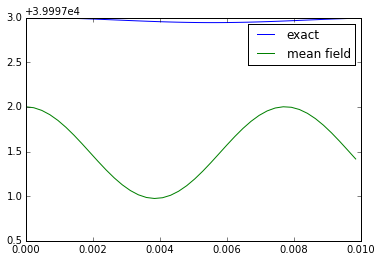

In [10]:
fock = np.loadtxt('fockout.txt')
fockold = np.loadtxt('fockout8000.txt')
mean = np.loadtxt('./MeanField/meanout.txt')
meanold = np.loadtxt('./MeanField/meanout (1).txt')

N = 8000
N2 = 40000
plt.plot(fock[0],fock[1],label = 'exact')
plt.plot(mean[0],mean[1]*N2, label = 'mean field')
plt.xlabel('')
plt.legend()
plt.savefig('testing.png')

In [342]:
from numpy.lib import scimath
def generate_states(N,s):
    """generate quasi probability distribution from Chapman paper"""
    scale = 1/np.sqrt(N)
    sx = np.random.randn(s)*scale
    sy = np.random.randn(s)*scale
    nyz = np.random.randn(s)*scale
    nxz = np.random.randn(s)*scale
    txip = np.zeros(s)
    txim = np.zeros(s)
    for i in range(s):
        if (sx[i]+nxz[i]) > 0:
            txip[i] = np.arctan(-(sy[i] + nyz[i])/(sx[i] + nxz[i]))
        else:
            txip[i] = np.arctan(-(sy[i] + nyz[i])/(sx[i] + nxz[i]) )#+ np.pi)
        if (sx[i]-nxz[i]) > 0:
            txim[i] = np.arctan((sy[i]-nyz[i])/(sx[i]-nxz[i]))
        else:
            txim[i] = np.arctan((sy[i] - nyz[i])/(sx[i] - nxz[i]))# + np.pi)
 
    
   
    a = (sx+nxz)/np.cos(txip)
    b = (sx-nxz)/np.cos(txim)
   

    rho_0 = 1/2 + scimath.sqrt(1/4-(a**2+b**2)/8)
    m = 1/rho_0*(a**2-b**2)/8

            
    states = np.zeros((len(m),3),dtype = complex)
    
    states[:,0] = scimath.sqrt((1-rho_0+m)/2) * np.exp(txip*1j)
    states[:,1] = scimath.sqrt(rho_0)
    states[:,2] = scimath.sqrt((1-rho_0-m)/2) * np.exp(txim*1j)
    
    return states,txip,txim

In [343]:
N=45000
states,tp,tm = generate_states(N,50000)

(44994, 45000)

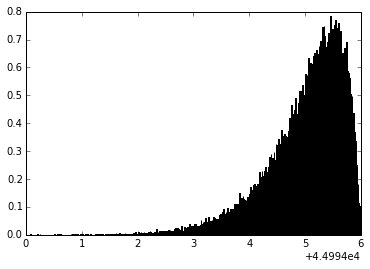

In [344]:
def msqr(x):
    return np.conj(x) * x
plt.hist(msqr(states[:,1]).real*N, bins =500,normed = True);
plt.xlim([44994,45000])

(-2.5, 2.5)

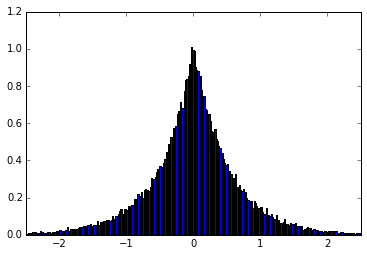

In [345]:

plt.hist((msqr(states[:,2]).real-msqr(states[:,0]).real)*N, bins =500,normed = True);
plt.xlim([-2.5,2.5])

In [346]:
m=(msqr(states[:,2]).real-msqr(states[:,0]).real)*N
mm = (msqr(states[:,2]).real+msqr(states[:,0]).real)*N
r = msqr(states[:,1]).real*N

In [347]:
np.mean(m)

0.0031459399690960191

In [348]:
np.std(m)

0.70657316116127111

In [349]:
1/np.sqrt(2)

0.70710678118654746

In [350]:
np.mean(r)

44999.002345181274

In [351]:
np.std(r)

0.70291652107684166

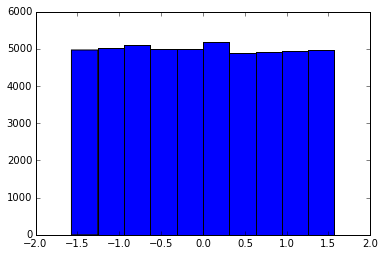

In [352]:
plt.hist(tp);

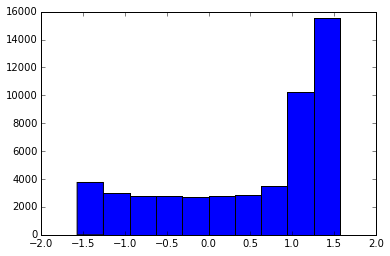

In [336]:
plt.hist(tm);

In [339]:
a= np.random.randn(1000)/40
b= np.random.randn(1000)/40
c= np.random.randn(1000)/40
d= np.random.randn(1000)/40

(-50, 50)

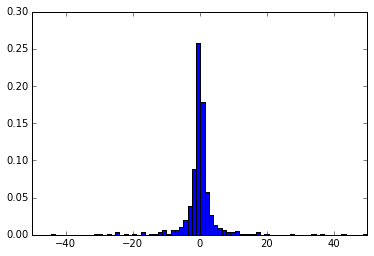

In [340]:
plt.hist(-(a+b)/(c+d),bins = 1000,normed=True);
plt.xlim([-50,50])

(-50, 50)

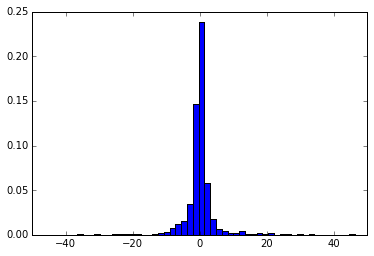

In [341]:
plt.hist((a-b)/(c-d),bins = 1000,normed=True);
plt.xlim([-50,50])